# Template & best practices.

The following notebook is a compilation of some of the best practices used in first Data Analysis (Data Exploration, Variable Importance, type variables and useful code to make modifcations in the data), Pre=processed data to feed the Machine Learning Algorithms, hiperparameters optimization and useful metrics to use depending of the case of use. 

### Import libraries

In [90]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB




#Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier


#Metrics

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Categorical transfromation.  

from sklearn.preprocessing import LabelBinarizer


## 1 - Data Exploration

Attribute Information:
Variations concern hull geometry coefficients and the Froude number:
 - Longitudinal position of the center of buoyancy [LC], adimensional.
 - Prismatic coefficient [PC], adimensional.
 - Length-displacement ratio [L/D], adimensional.
 - Beam-draught ratio [B/Dr], adimensional.
 - Length-beam ratio [L/B], adimensional.
 - Froude number [Fr], adimensional.
 - The measured variable is the residuary resistance per unit weight of displacement:
 - Residuary resistance per unit weight of displacement [Rr], adimensional.

#### Importing the data to our notebook.

First of all we will make a initial exploration of our data to see the number of columns, how many variables or characterestis has the dataset, etc...

In [91]:
# get titanic & test csv files as a DataFrame
pred_man_df = pd.read_csv("../data/yacht_hydro.csv")


In [92]:
# preview the data
pred_man_df.head(10)

,LC,PC,L/D,B/Dr,L/B,Fr,Rr
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
5,-2.3,0.568,4.78,3.99,3.17,0.250,1.82
6,-2.3,0.568,4.78,3.99,3.17,0.275,2.61
7,-2.3,0.568,4.78,3.99,3.17,0.300,3.76
8,-2.3,0.568,4.78,3.99,3.17,0.325,4.99
9,-2.3,0.568,4.78,3.99,3.17,0.350,7.16


#### Entries, nulls, type of variable

Check the number of nulls, the registers and the variable type of each feature.

In [93]:
pred_man_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LC      308 non-null    float64
 1   PC      308 non-null    float64
 2   L/D     308 non-null    float64
 3   B/Dr    308 non-null    float64
 4   L/B     308 non-null    float64
 5   Fr      308 non-null    float64
 6   Rr      308 non-null    float64
dtypes: float64(7)
memory usage: 17.0 KB


In [94]:
pred_man_df.describe()

,LC,PC,L/D,B/Dr,L/B,Fr,Rr
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


Null perntage in every variable of the dataset. 

In [95]:
pred_man_df.isnull().sum() / len(pred_man_df) * 100

LC      0.0
PC      0.0
L/D     0.0
B/Dr    0.0
L/B     0.0
Fr      0.0
Rr      0.0
dtype: float64

## 2 - Data cleaning and ETL techniques

Method

## 3 - Data Visualization.

<AxesSubplot:>

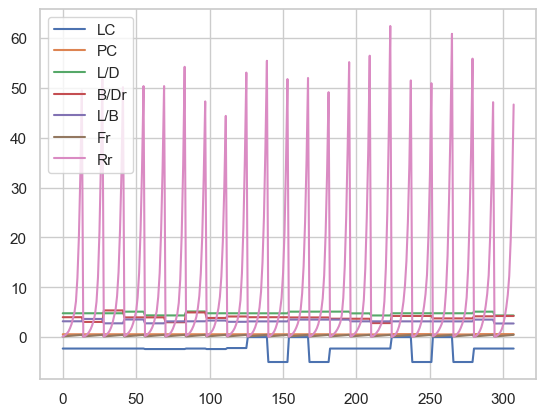

In [96]:
pred_man_df.plot()

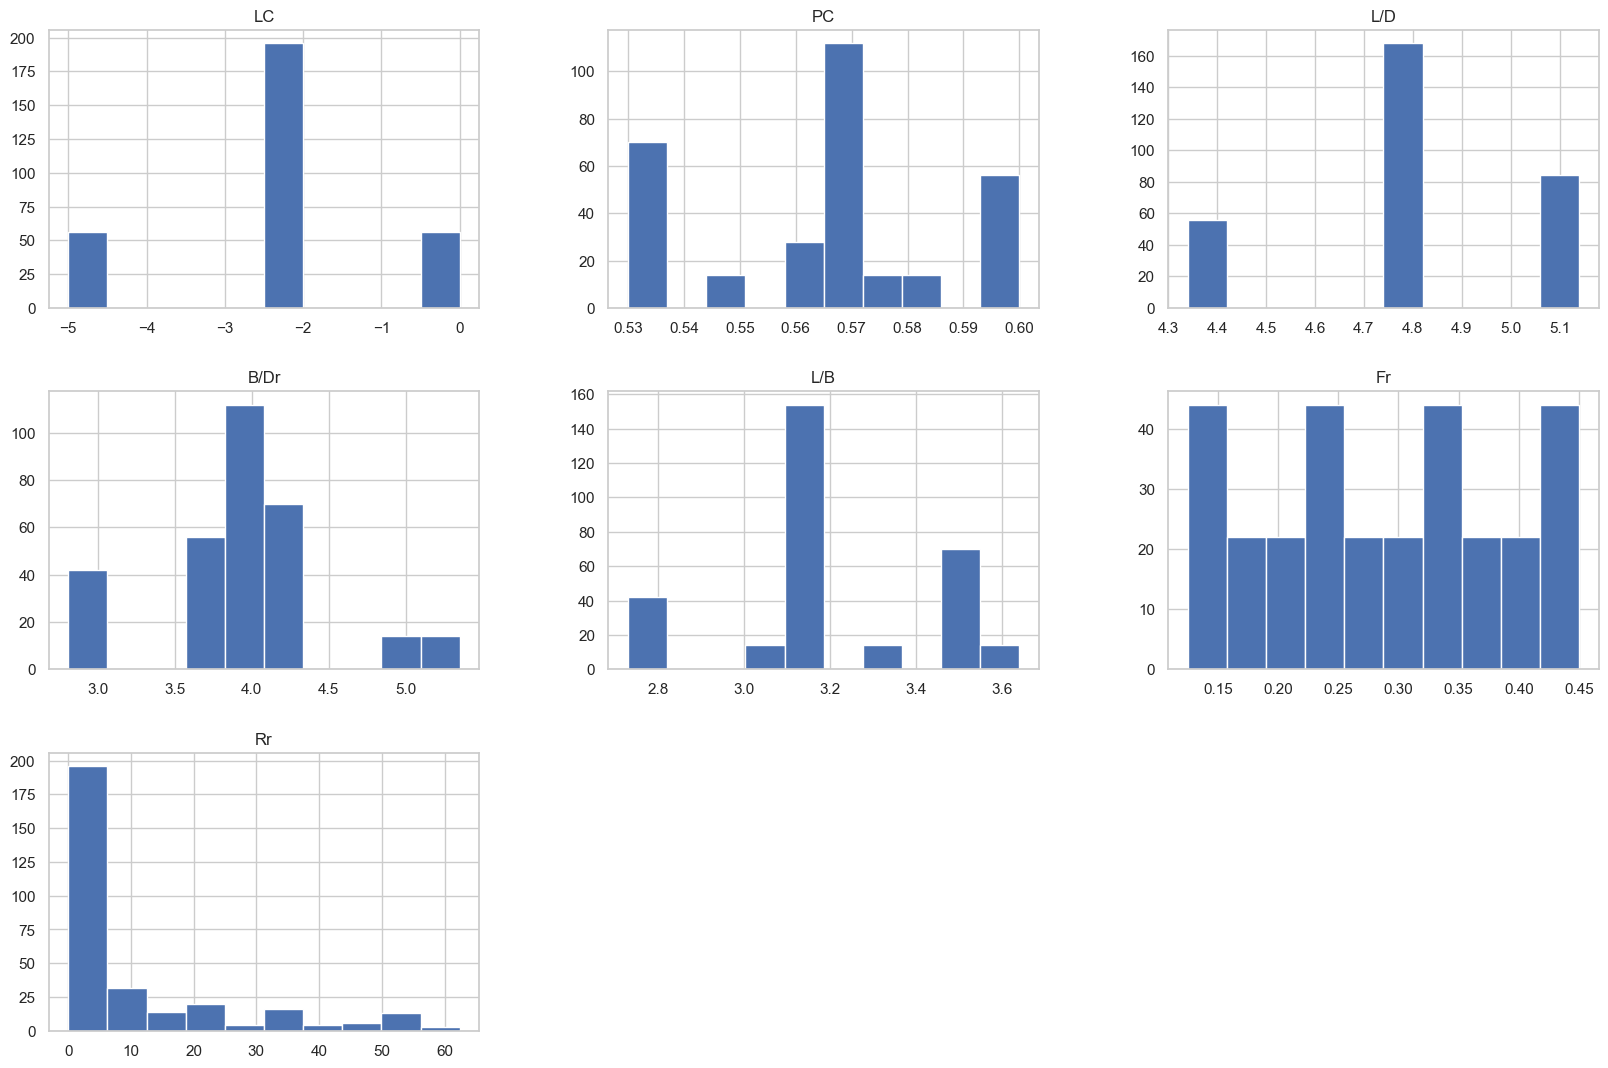

In [97]:
pred_man_df.hist(figsize=[20,13])
plt.show()

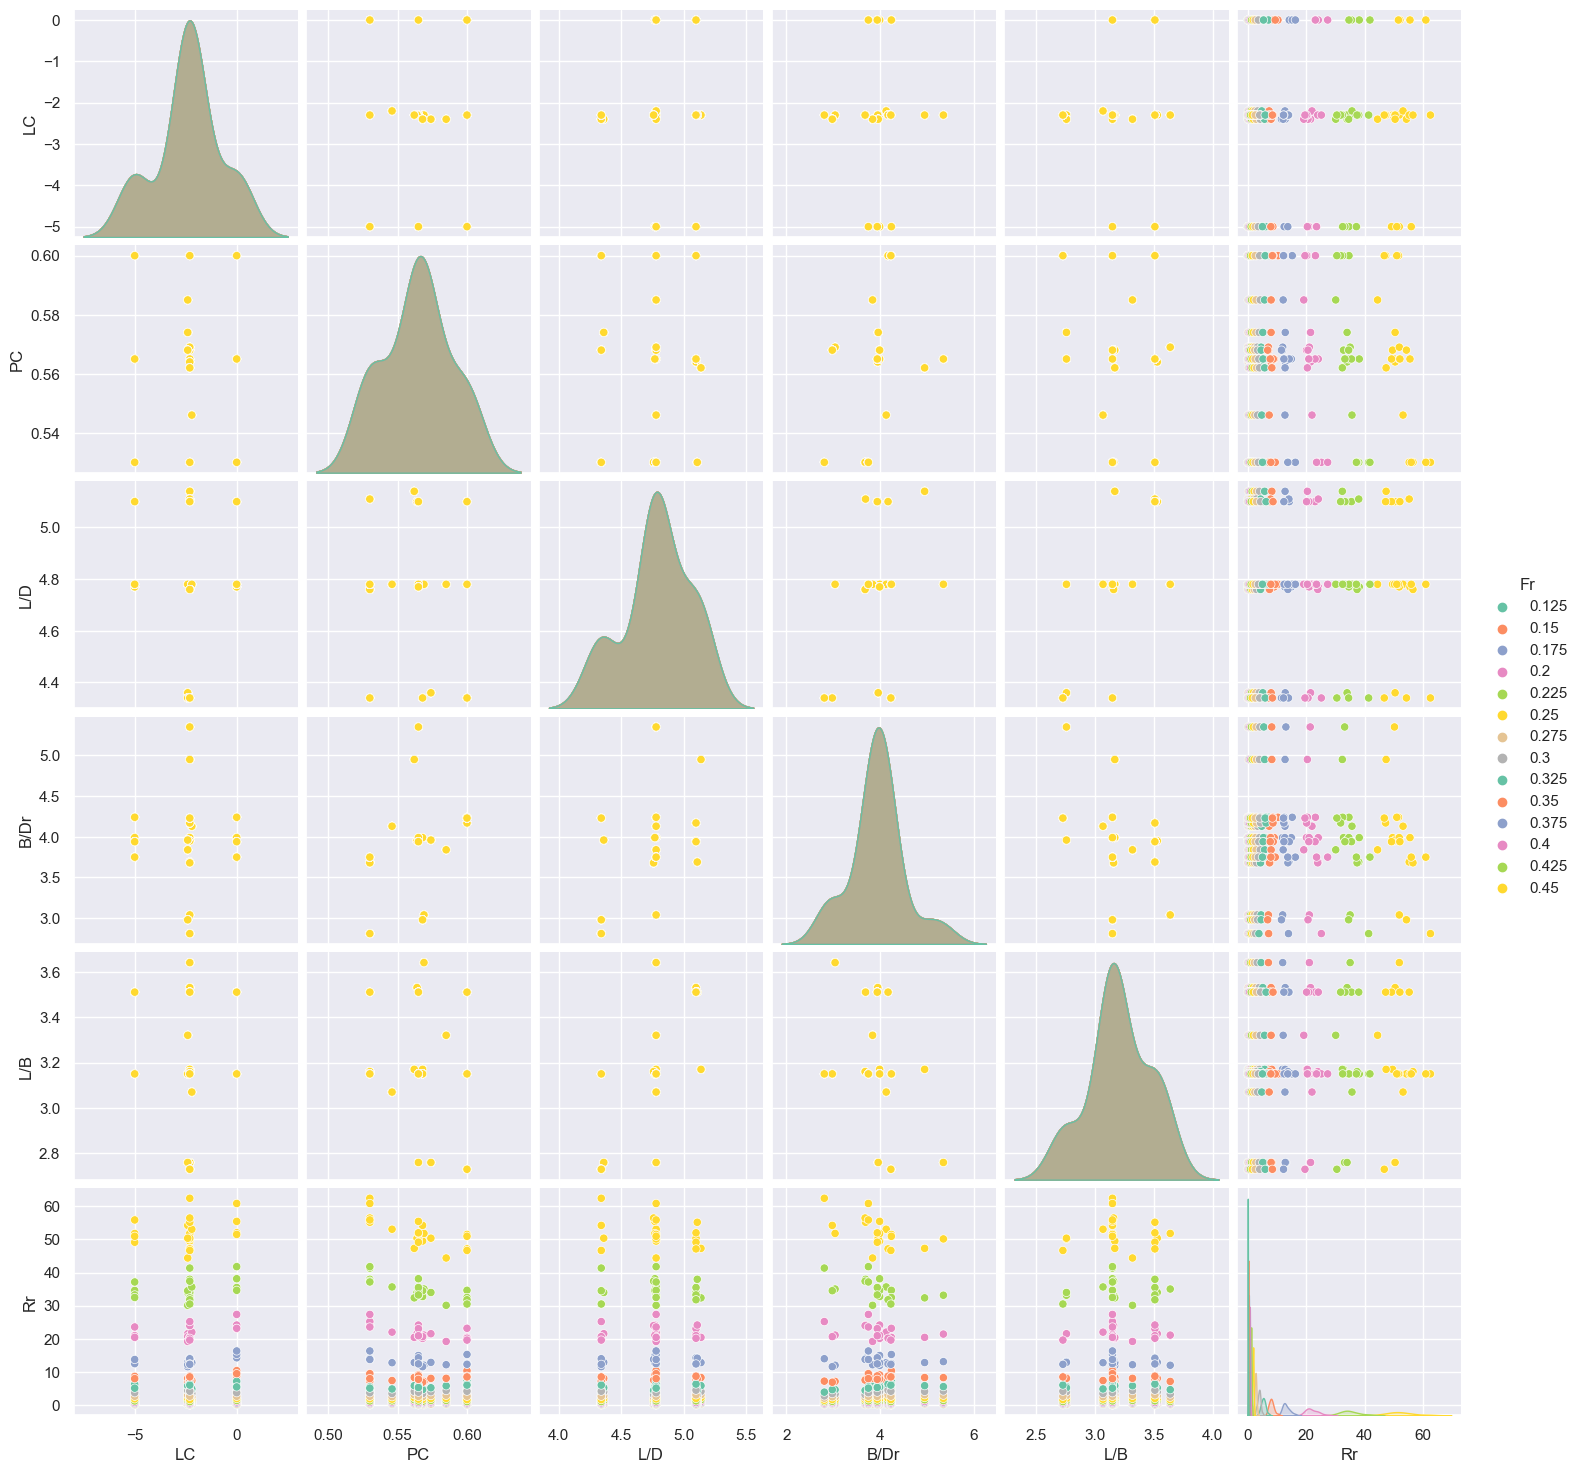

In [98]:
sns.set_theme()
sns.pairplot(pred_man_df,
             kind="scatter",
             hue="Fr",
             palette="Set2")


The following chart shows possible outlayers in the variables. 

<AxesSubplot:>

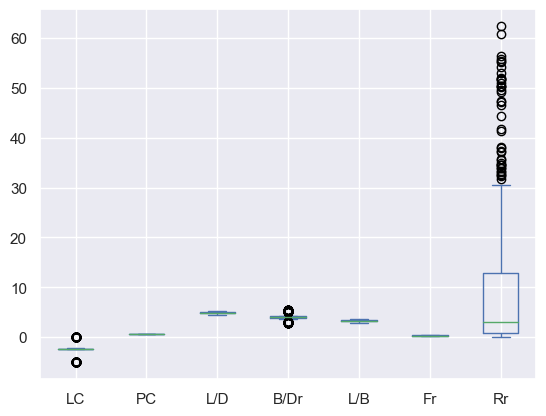

In [99]:
# Check outlayers

pred_man_df.plot.box()


<AxesSubplot:xlabel='Fr', ylabel='Rr'>

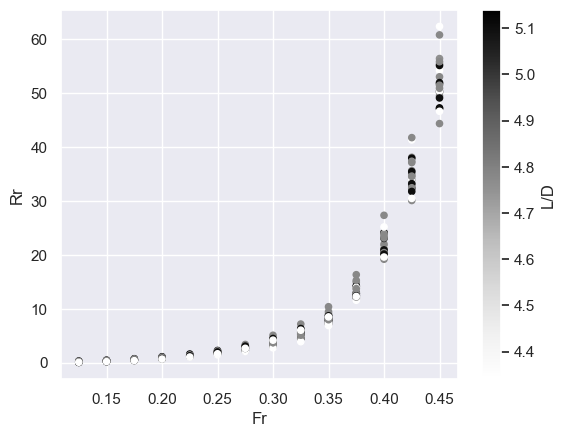

In [100]:
pred_man_df.plot.scatter(x="Fr", y="Rr", c="L/D")

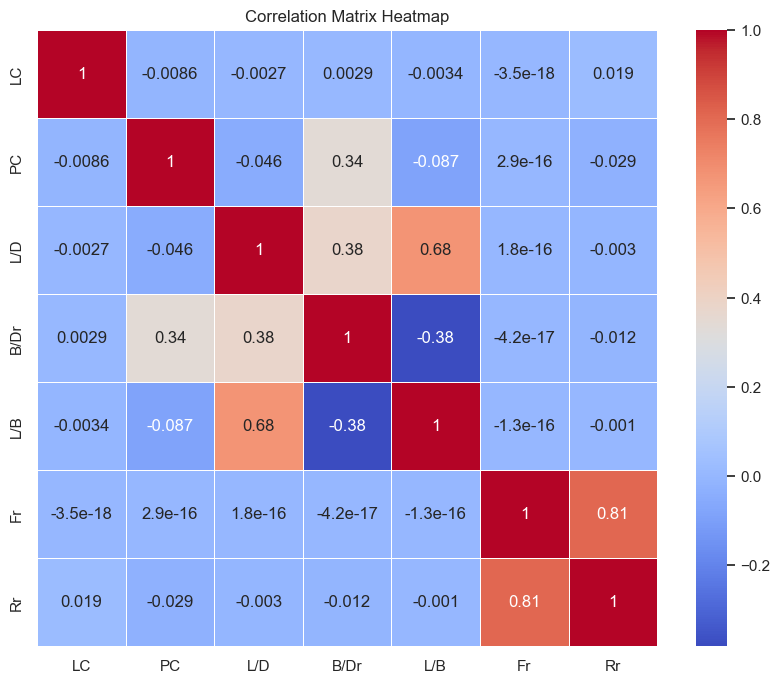

In [101]:
# Calculate the correlation matrix
correlation_matrix = pred_man_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Comments of the data and results of the exploration. 

### 5 - Normalize data. 

Bear in mind that you will need to separate the categorical data before you make any normalization to the data. Use Label Binarizer, One Hot encoding or any to convert the categorical data into numbers.

It is important to maintain a scale of data from the beggining due to the machine laerning algorithms are sensitive to the scale of data. You can use any of the folloiwng standarization methods.

   - MinMaxScaler
   - MaxAbsScaler
   - Normalizer
   - RobustScaler

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.16616243, -0.03418367,  0.09717082, -0.14870298, -1.61245155],
       [ 0.16616243, -0.03418367,  0.09717082, -0.14870298, -1.36438208],
       [ 0.16616243, -0.03418367,  0.09717082, -0.14870298, -1.11631261],
       ...,
       [ 1.5423783 , -1.7757515 ,  0.53568528, -1.92579533,  1.11631261],
       [ 1.5423783 , -1.7757515 ,  0.53568528, -1.92579533,  1.36438208],
       [ 1.5423783 , -1.7757515 ,  0.53568528, -1.92579533,  1.61245155]])

### 6 - Generate Test and Train sets

Sometimes you need to do Feature Enginering if that's the case continue with the second option. Change the test size depending of the dataset size. In practice you can adjust the test_size 80% for training and 20% for testing. 

In [166]:

# Divide into test ans sets train:
X = pred_man_df.drop('Rr', axis=1)
X.to_numpy()
y = pred_man_df['Rr']
y.head()




0    0.11
1    0.27
2    0.47
3    0.78
4    1.18
Name: Rr, dtype: float64

Separate the data test and train. 

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# In case you need to so feature enginering:

#X_train, X_test= train_test_split(X, test_size=0.2, random_state=42)


Test and train stratified mehtod:


Check the following article
https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/#:~:text=Stratified%20Train%2DTest%20Splits,-One%20final%20consideration&text=Some%20classification%20problems%20do%20not,observed%20in%20the%20original%20dataset.

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=24)
for train_index, test_index in split.split(housing_df, housing_df["categoria_income"]):
    train_set = housing_df.loc[train_index]
    test_set = housing_df.loc[test_index]

plt.figure()
housing_df["categoria_income"].hist(bins=5, density=True, alpha=.2)
test_set["categoria_income"].hist(bins=5, density=True, alpha=.2)
plt.show()

NameError: name 'housing_df' is not defined

## 7 - Feature Enginering

The following section consists in create features to our dataset in order to improve the efficency of our model. 

## 8 - Check your data and compare with some Machine Learning Algorithms

#### Linear Regresion.

1. Predictive Modeling:

 - Purpose: Linear regression is commonly used for making predictions. Given a set of input features, it can predict the value of the target variable.
 - Examples: Predicting house prices based on features like square footage, number of bedrooms, and location; forecasting sales based on advertising spending; predicting a person's income based on their education and experience.

2. Understanding Relationships:

 - Purpose: Linear regression helps in understanding how the change in one or more independent variables is associated with changes in the target variable.
 - Examples: Analyzing the impact of temperature on ice cream sales, studying the relationship between age and blood pressure, or investigating the influence of education on job salary.

3. Hypothesis Testing:

 - Purpose: Linear regression can be used for hypothesis testing to determine if there is a statistically significant relationship between the independent and dependent variables.
 - Examples: Assessing whether a new marketing campaign has a significant impact on sales, or testing if a specific medication has a significant effect on patient recovery time.

4. Control and Optimization:

 - Purpose: Linear regression can be employed in control systems and optimization processes to control or optimize a particular outcome.
 - Examples: Controlling the temperature of an industrial process based on sensor inputs, optimizing the allocation of resources in a supply chain to minimize costs.


Linear regression works by fitting a linear equation to the data, which has the form:

$Y$ = $b_0 + b_1 X_1, b_2 X_2, \ldots, b_p X_p + \epsilon$


$Y$ is the target variable.
$b_0$ is the intercept (the value of $Y$ when all $X$ variables are 0).
$b_1, b_2, \ldots, b_p$ are the coefficients of the independent variables $X_1, X_2, \ldots, X_p$.
$\epsilon$ is the error term, representing the unexplained variability in the target variable.
Linear regression aims to find the best-fitting line (hyperplane in multiple dimensions) that minimizes the sum of squared differences between the predicted values and the actual values.

Linear regression is best suited for situations where there is a linear relationship between the independent and dependent variables. It is simple, interpretable, and can provide insights into the data. However, it may not perform well in cases of non-linear relationships, and assumptions about the residuals (e.g., constant variance) should be checked.

For more complex relationships, other regression techniques like polynomial regression, decision tree regression, or support vector regression may be more appropriate.

Check the following:
https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

RRr Skewness and Kurtosis. 

In [168]:
y_train = np.log(y_train)
y_test = np.log(y_test)



clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.9537278756704612

In [169]:
from sklearn.model_selection import cross_val_score
num_folds = 5  # You can choose the number of folds
scoring_metric = 'neg_mean_squared_error'
scores = cross_val_score(clf, X_train, y_train, cv=num_folds, scoring=scoring_metric)
# Calculate RMSE for each fold
rmse_scores = (-scores) ** 0.5

# Calculate mean RMSE and standard deviation
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print(f"Mean RMSE: {mean_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

Mean RMSE: 0.2825896866156728
Standard Deviation of RMSE: 0.09722078987029459



<b>Mean Squared Error (MSE):</b> This metric measures the average squared difference between the true and predicted values. Lower MSE indicates better performance.

<b>Root Mean Squared Error (RMSE):</b> RMSE is the square root of MSE and provides a more interpretable error metric. It is in the same units as the target variable.

<b>R-squared (R2) Score:</b> R2 measures the proportion of variance in the target variable explained by the model. It ranges from 0 to 1, where 1 indicates a perfect fit. Higher R2 values indicate better model performance.

These regression metrics are used to quantify the quality of your Linear Regression model's predictions and how well it fits the data. Lower MSE and RMSE and higher R2 scores indicate better model performance. You can include these metrics in your evaluation as well to provide quantitative measures of your model's accuracy in predicting numerical values.

In [170]:
# 2. Make predictions on the test set
y_pred = clf.predict(X_test)

# 3. Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.15223427976963033
Root Mean Squared Error (RMSE): 0.3901721155716158
R-squared (R2) Score: 0.9537278756704612


1. True Values vs. Predicted Values Scatterplot:

 - <b> X-axis (True Values)</b>: This axis represents the actual target values (ground truth) from your test set.
 - <b> Y-axis (Predicted Values):</b> This axis represents the values predicted by your Linear Regression model for the corresponding test set examples.
 - <b> Purpose:</b> This scatterplot allows you to visually compare how well your model's predictions match the actual values. Ideally, the points should cluster around a diagonal line (y = x). If the points deviate significantly from this line, it indicates discrepancies between predictions and actual values.

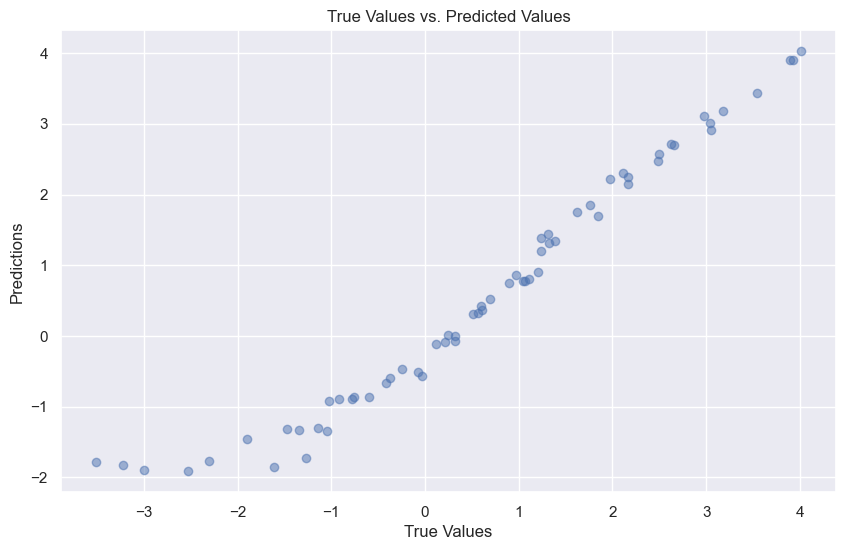

In [171]:
# 4. Visualize the model's performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predicted Values")
plt.show()


2. Residual Plot:

 - <b> X-axis (Predicted Values):</b> This axis represents the predicted values.
 - <b>  Y-axis (Residuals): </b>Residuals are the differences between the true values and the predicted values (true - predicted).
 - <b> Purpose:</b> The residual plot helps you assess whether the residuals exhibit any patterns or trends. In a good model, residuals should be randomly scattered around the horizontal line at y = 0. Patterns in the residuals (e.g., a U-shape or funnel shape) can indicate issues like heteroscedasticity or non-linearity.

   To avoid heteroscedasticity or non-linearity.

    1. Feature Engineering: You can engineer new features or transform existing ones to improve linearity. Common transformations include taking the logarithm, square root, or inverse of variables. These transformations can help make the relationship between variables more linear.

    2. Residual Analysis: After fitting a linear regression model, you should analyze the residuals (the differences between observed and predicted values). Plotting the residuals against predicted values or independent variables can help identify patterns. Ideally, residuals should be randomly distributed around zero with no discernible patterns.

    3. Outlier Detection and Handling: Outliers can greatly impact the linearity of the model. Identify and handle outliers, either by removing them or using robust regression techniques that are less sensitive to outliers.

    4. Polynomial Regression: If a simple linear model doesn't capture the relationship between variables, you can consider using polynomial regression. This involves adding polynomial terms (e.g., quadratic or cubic) to the model equation to capture non-linear relationships.

    5. Interaction Terms: Include interaction terms between variables if there is reason to believe that the effect of one variable depends on the value of another. This can help address non-linearity.

    6. Normalization or Standardization: While normalizing (scaling to a specific range like [0, 1]) or standardizing (scaling to have mean 0 and standard deviation 1) your independent variables is generally good practice for many machine learning models, it may not directly address non-linearity or heteroscedasticity. However, scaling can improve the numerical stability of some optimization algorithms and may indirectly help with model performance.

    7. Weighted Regression: In cases where heteroscedasticity is present, you can use weighted regression techniques. Weighted least squares assigns different weights to each data point based on the variability of the residuals. This gives more importance to data points with smaller residuals, which can mitigate the impact of heteroscedasticity.

    8. Non-Linear Models: If your data exhibits a clear non-linear relationship, consider using non-linear regression models, such as decision trees, support vector regression, or neural networks.

    9. Data Collection: In some cases, addressing non-linearity may involve collecting more data or gathering additional features that better capture the underlying relationship.

    The specific steps you take will depend on the nature of your data and the problem you're trying to solve. A combination of these strategies may be necessary to improve the linearity and overall performance of your linear regression model.




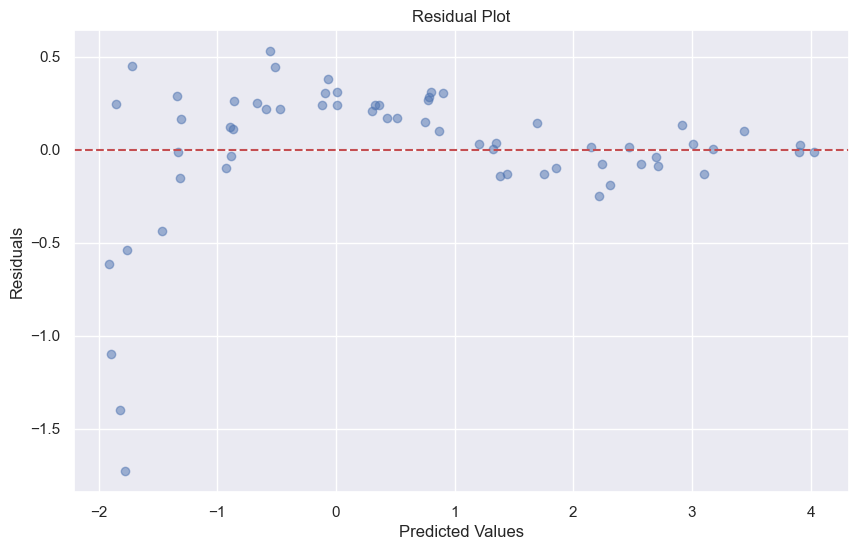

In [159]:
# 5. Residual Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

3. Distribution of Residuals Histogram:

 - <b> X-axis (Residuals):</b> This axis represents the values of the residuals.
 - <b> Y-axis (Frequency):</b>The number of data points that fall into each bin on the X-axis.
 - <b>Purpose:</b> The histogram shows the distribution of residuals. In a well-behaved model, the residuals should approximate a normal distribution (bell-shaped curve). Deviations from normality may suggest issues with the model's assumptions or data.


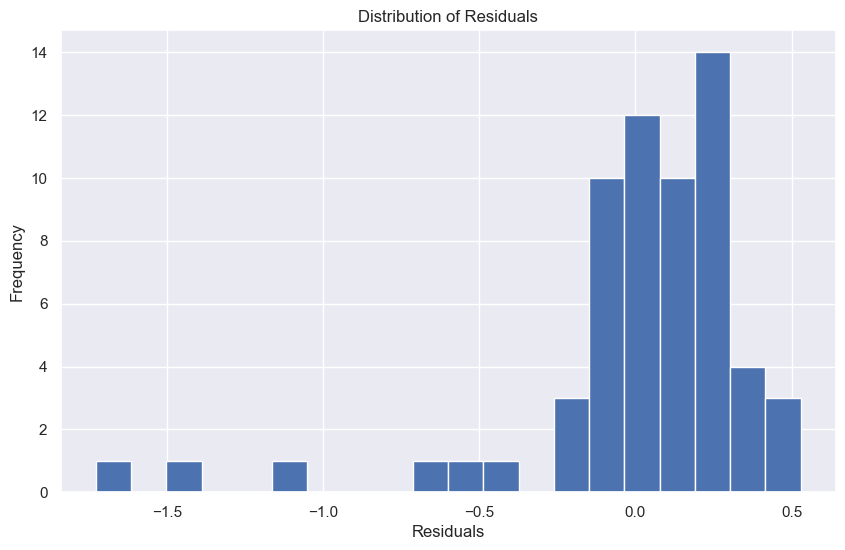

In [160]:
# 6. Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

## 9 - Prepare data for Machine Learning Algorithms.




It is important that all the transformations made above are included in the pipelines before feedding the machine learning. I find a good practice to separate the numeric data and the categorical data to majke the pertinent transformations. 

In [ ]:
# Class to include the trnaformations needed for categorical variables.

class LabelBinarizerPipeline(LabelBinarizer):
    def fit(self, X, y=None):
        super(LabelBinarizerPipeline, self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipeline, self).transform(X)

    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipeline, self).fit(X).transform(X)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion


#Just separa te columns according it's type to make the trnasformations.
#num_cols = list(numeric_df)
#cat_cols = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_cols)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_cols)),
    ('label_binarizer', LabelBinarizerPipeline())
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [ ]:
## Example of full pipeline

final_data = full_pipeline.fit_transform(california_df)

In [ ]:


from sklearn import svm
from sklearn import linear_model
from sklearn import model_selection

model_linear_hog = svm.LinearSVC()
model_logistic_hog = linear_model.LogisticRegression(solver='lbfgs', max_iter=80)
random_forest_hog = RandomForestClassifier(n_estimators=100, random_state=123)